## Лабораторная работа №4
- Построить для каждого файлика линейную, квадратичную, экспоненциальную аппроксимацию методом наименьших квадратов.
- Посчитать для каждого файлика ошибку аппроксимации для всех видов, выбрать лучшую аппроксимирующую функцию.


In [22]:
import math
import os
import matplotlib.pyplot as plt

def swap_rows(matrix, row1, row2):
    matrix[row1], matrix[row2] = matrix[row2], matrix[row1]


def gaussian_elimination(matrix):
    n = len(matrix)
    for k in range(n - 1):
        swap_rows(matrix, max(range(k, n), key=lambda i: abs(matrix[i][k])), k)
        for i in range(k + 1, n):
            factor = matrix[i][k] / matrix[k][k]
            matrix[i][-1] -= factor * matrix[k][-1]
            for j in range(k, n):
                matrix[i][j] -= factor * matrix[k][j]

    x = [0] * n
    for k in range(n - 1, -1, -1):
        x[k] = (matrix[k][-1] - sum(matrix[k][j] * x[j] for j in range(k + 1, n))) / matrix[k][k]
    return x


def mean_squared_error(y_true, y_pred, n):
    return sum((y_true[i] - y_pred[i]) ** 2 for i in range(n)) / n


def linear_approximation(x_values, y_values):
    n = len(x_values)
    xy, x, y, xx = (
        sum(x * y for x, y in zip(x_values, y_values)),
        sum(x_values),
        sum(y_values),
        sum(x**2 for x in x_values),
    )
    a = (n * xy - x * y) / (n * xx - x**2)
    b = (y - a * x) / n

    y_pred = [a * x + b for x in x_values]
    mse = mean_squared_error(y_values, y_pred, n)

    return y_pred, mse


def quadratic_approximation(x_values, y_values):
    n = len(x_values)
    xxxx, xxx, xx, x, xxy, xy, y = (
        sum(x**4 for x in x_values),
        sum(x**3 for x in x_values),
        sum(x**2 for x in x_values),
        sum(x_values),
        sum(x**2 * y for x, y in zip(x_values, y_values)),
        sum(x * y for x, y in zip(x_values, y_values)),
        sum(y_values),
    )
    A = [[xxxx, xxx, xx, xxy], [xxx, xx, x, xy], [xx, x, n, y]]
    coeff = gaussian_elimination(A)

    y_pred = [coeff[0] * x**2 + coeff[1] * x + coeff[2] for x in x_values]
    mse = mean_squared_error(y_values, y_pred, n)

    return y_pred, mse


def exponential_approximation(x_values, y_values):
    n = len(x_values)
    x, y, lny, xx, xlny = (
        sum(x_values),
        sum(y_values),
        sum(math.log(y) for y in y_values if y > 0),
        sum(x**2 for x in x_values),
        sum(x * math.log(y) for x, y in zip(x_values, y_values) if y > 0),
    )
    A = [[xx, x, xlny], [x, n, lny]]
    coeff = gaussian_elimination(A)

    y_pred = [math.e ** coeff[1] * math.e ** (x * coeff[0]) for x in x_values]
    mse = mean_squared_error(y_values, y_pred, n)

    return y_pred, mse

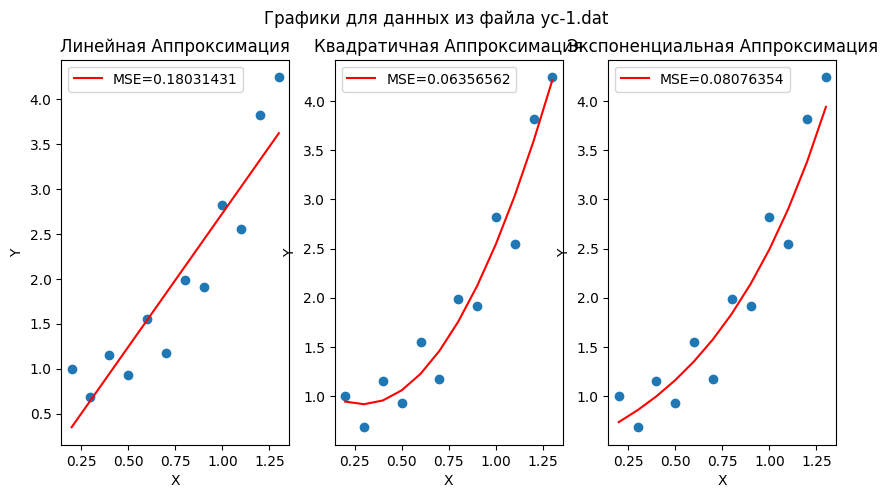

Для файла yc-1.dat
Лучшая квадратичная аппроксимация. MSE = 0.06357


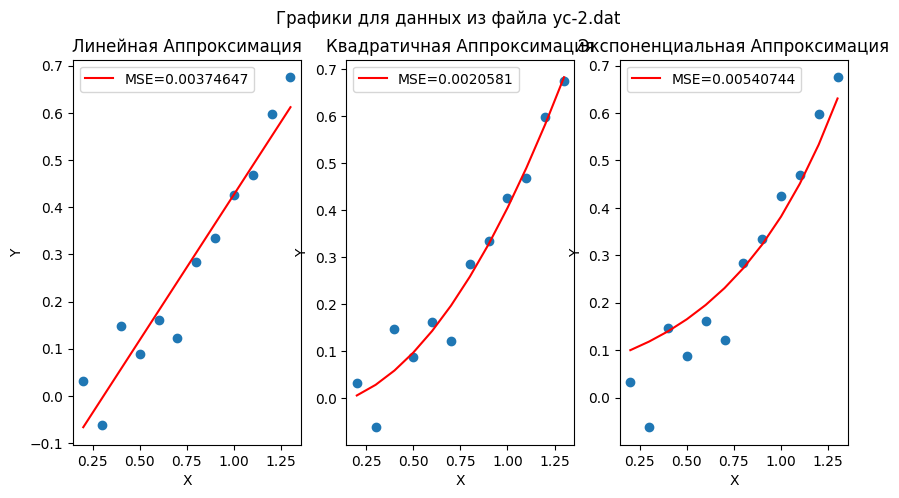

Для файла yc-2.dat
Лучшая квадратичная аппроксимация. MSE = 0.00206


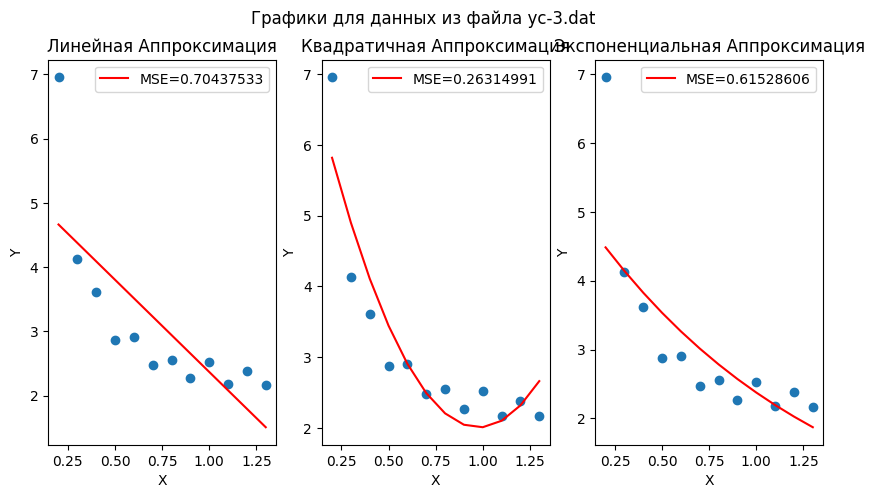

Для файла yc-3.dat
Лучшая квадратичная аппроксимация. MSE = 0.26315


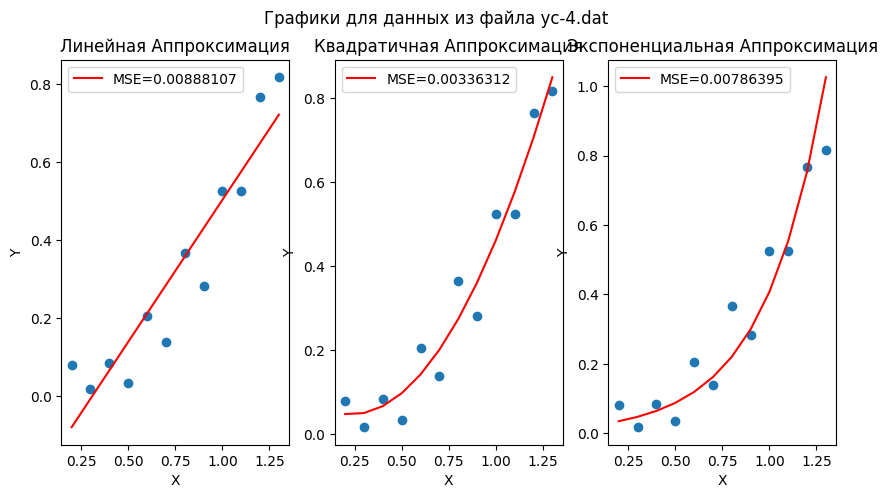

Для файла yc-4.dat
Лучшая квадратичная аппроксимация. MSE = 0.00336


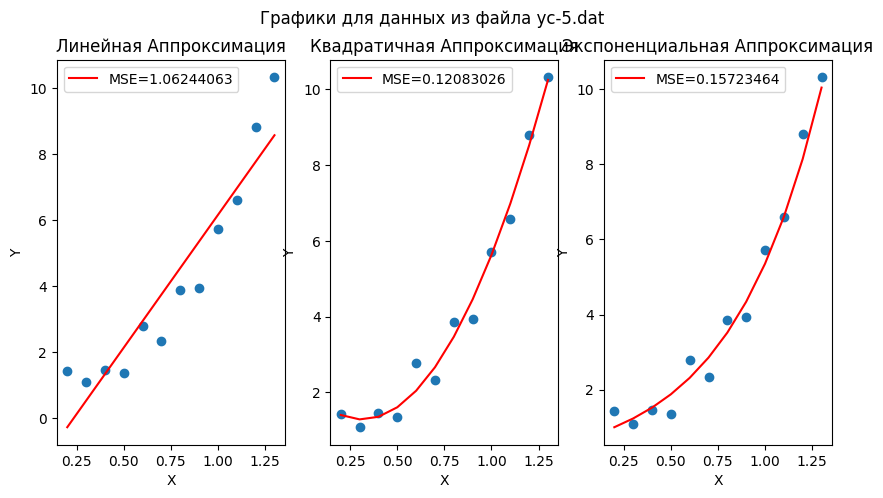

Для файла yc-5.dat
Лучшая квадратичная аппроксимация. MSE = 0.12083


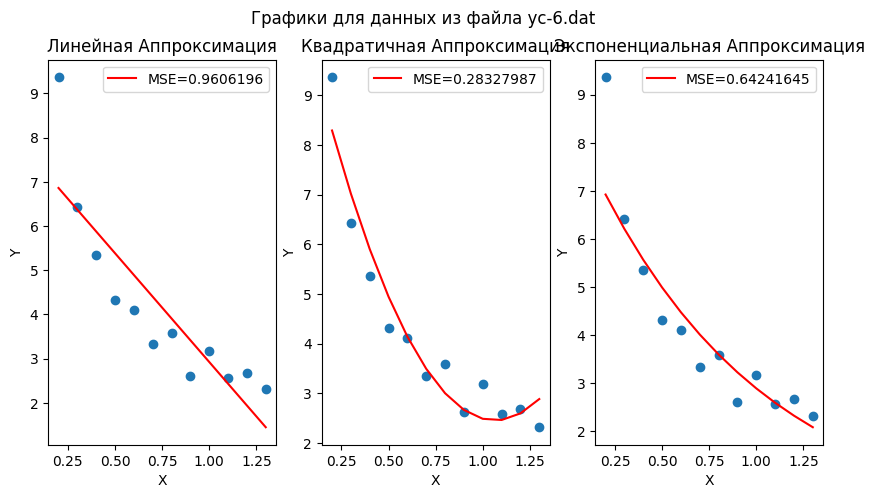

Для файла yc-6.dat
Лучшая квадратичная аппроксимация. MSE = 0.28328


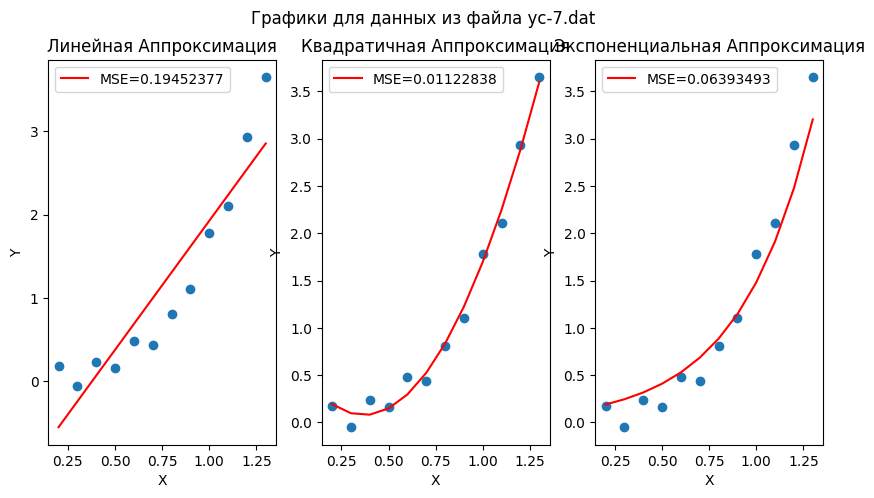

Для файла yc-7.dat
Лучшая квадратичная аппроксимация. MSE = 0.01123


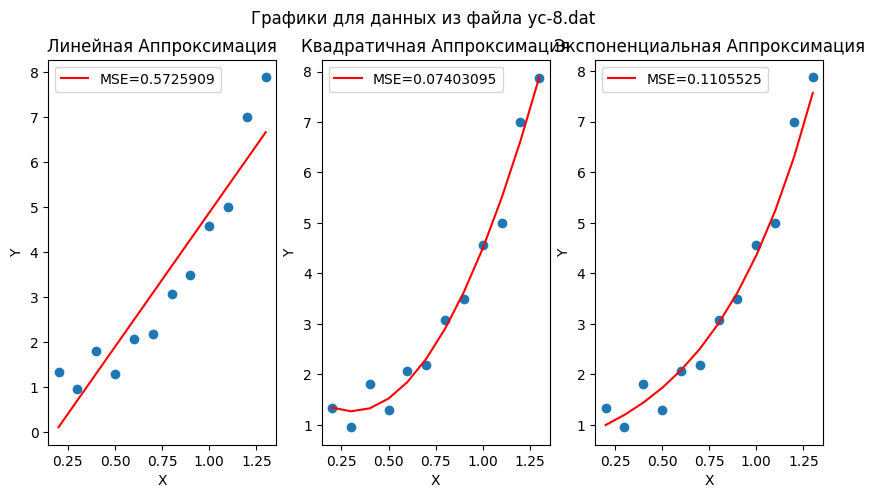

Для файла yc-8.dat
Лучшая квадратичная аппроксимация. MSE = 0.07403


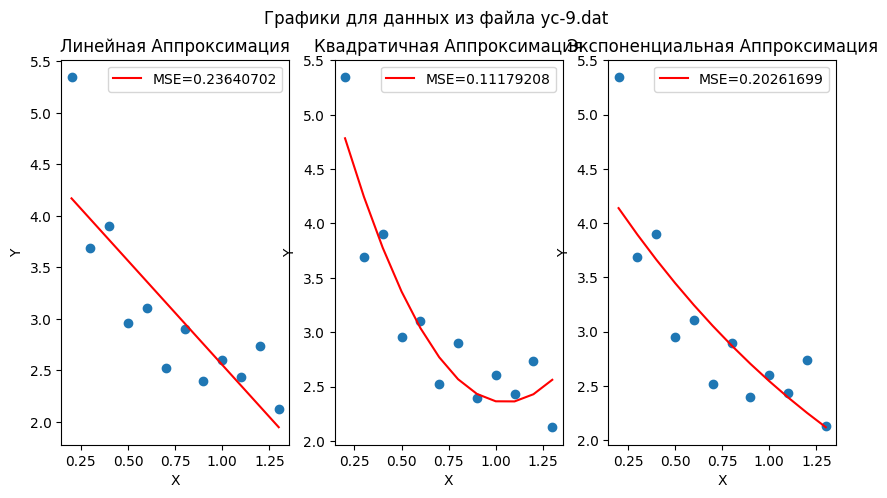

Для файла yc-9.dat
Лучшая квадратичная аппроксимация. MSE = 0.11179


In [23]:
def read_data(file_path):
    with open(file_path, "r") as f:
        content = f.read().replace("\n", " ")
        return [float(value) for value in content.split()]


def display_best_approximation(mse_linear, mse_quadratic, mse_exponential):
    min_mse = min(mse_linear, mse_quadratic, mse_exponential)
    if min_mse == mse_linear:
        print(
            f"Лучшая линейная аппроксимация. MSE = {min_mse:.5f}",
        )
    elif min_mse == mse_quadratic:
        print(
            f"Лучшая квадратичная аппроксимация. MSE = {min_mse:.5f}",
        )
    else:
        print(
            f"Лучшая экспоненциальная аппроксимация. MSE = {min_mse:.5f}",
        )


path_to_dot_dat_folder = "./data/lab4/"
x_dat_filename = "xc.dat"
y_dat_files_paths = sorted(
    [filename for filename in os.listdir(path_to_dot_dat_folder) if filename.startswith("yc")]
)


with open(path_to_dot_dat_folder + x_dat_filename, "r") as f:
    data = f.read().replace("\n", " ")
    X = [float(x) for x in data.split()]

for path_to_y_dat_file in y_dat_files_paths:
    Y = read_data(path_to_dot_dat_folder + path_to_y_dat_file)

    data_linear = linear_approximation(X, Y)
    data_quadratic = quadratic_approximation(X, Y)
    data_exponential = exponential_approximation(X, Y)

    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    fig.suptitle("Графики для данных из файла " + path_to_y_dat_file)

    axs[0].set_title("Линейная Аппроксимация")
    axs[0].scatter(X, Y)
    axs[0].plot(X, data_linear[0], color="red", label=f"MSE={round(data_linear[1], 8)}")
    axs[0].legend(loc="best")
    axs[0].set_xlabel("X")
    axs[0].set_ylabel("Y")

    axs[1].set_title("Квадратичная Аппроксимация")
    axs[1].scatter(X, Y)
    axs[1].plot(X, data_quadratic[0], color="red", label=f"MSE={round(data_quadratic[1], 8)}")
    axs[1].legend(loc="best")
    axs[1].set_xlabel("X")
    axs[1].set_ylabel("Y")

    axs[2].set_title("Экспоненциальная Аппроксимация")
    axs[2].scatter(X, Y)
    axs[2].plot(X, data_exponential[0], color="red", label=f"MSE={round(data_exponential[1], 8)}")
    axs[2].legend(loc="best")
    axs[2].set_xlabel("X")
    axs[2].set_ylabel("Y")

    plt.show()

    print(f"Для файла {path_to_y_dat_file}")
    display_best_approximation(data_linear[1], data_quadratic[1], data_exponential[1])